# HW11-Neural Networks

### Q1. (2 points))—one answer per group

1)	Explain the dataset you are using in your project. <br />
 a)	Why did you choose that dataset? What do you find interesting in it? What are some major concerns that you have about it?<br />
 b)	What are the features and labels? Is it a regression or classification problem?<br />
What relation between variables are you trying to learn? Why do you think those relations are interesting or important?<br />
 c)	What are your a priori hypotheses about the relations that you will find? Why?<br />
 d)	What would you define as success in this project? Explain.<br />


2)	Explain your analysis<br />
a)	What kind of analysis method (machine-learning algorithms) are you using or do you plan to use? Why do you plan to use those methods over others? <br />
b)	What kind of results (in terms of accuracy or AUC ROC) do you anticipate? Why?


(write here)




















### Q2. (4 points)

In the recitation class we went over a neural-networks example. Here we similarly ask that you load the MNIST dataset (also used in the clip we watched in class). Then use the Keras package and train a neural network with 2 hidden layers, 16 neurons each. The input layer is 784 neurons, the flattened image size (assuming all bias terms are automatically added to the network). When the neural network starts running, there are 16 set of weights of size 784 in the first hidden layer. In the second hidden layer, the input size is 16 and the output size is 10. Use softmax in the output layer. All the network’s weights are learned from the training set, made up of samples, using stochastic gradient descent and backpropagation 

a) Extract the weights from the first hidden layer (784x16) and from the second hidden layer (16x16). For each hidden layer, reshape the weights to a two-dimension images (for example, sixteen 28x28 image outputs for the first hidden layer and sixteen 4x4 image outputs for the second hidden layer). Plot the images for each hidden layer.

b) What are the plots of weight images telling you about the neural network? How do you think the neural network is picking up important features from the images, if at all?

c) Do the same thing as in a) for a different, fully connected feed-forward neural-network architecture of your choice (i.e., each neuron in layer i connects to each neuron in layer i+1 and only to those neurons). The network should have at least 2 hidden layers too. Then compare the weight images output for the first two hidden layers. Is there a difference compare to the weight images in (a)? Explain the difference or similarity that exists.


Hint: 

1- **We were able to achieve 96% test accuracy within 20 epochs)**

2- You can extract the weights by running the following code after you extract the weights:

weights = []

for layer in model.layers:

weights.append(layer.get_weights())

In [1]:
## your code here
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import warnings
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Using TensorFlow backend.


In [2]:
# 128 images in each batch
batch_size = 128
# 0-9 numbered images
num_classes = 10
# train for 20 steps
epochs = 5

(x_train, y_train), (x_test, y_test) = mnist.load_data()
# flatten the data
x_train = x_train.reshape(-1, 784) #28*28=784
x_test = x_test.reshape(-1, 784)

x_train = x_train.astype('float32')  
x_test = x_test.astype('float32')

# Scale the data to be between 0 and 1
x_train /= 255.  
x_test /= 255.

# print(x_train.shape[0], 'train samples')
# print(x_test.shape[0], 'test samples')

# convert class vectors
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# print(y_train.shape, 'y_train')
# print(y_test.shape, 'y_test')

In [3]:
# start building the model
model = Sequential()

# add a fully connected layer
model.add(Dense(16, activation='relu', input_shape=(784,)))

model.add(Dense(16, activation='relu', input_shape=(256,)))

model.add(Dense(num_classes, activation='softmax'))

In [4]:
model.compile(
    loss = 'categorical_crossentropy', # notice this isn't MSE because we're not doing regression
    optimizer = SGD(),
    metrics = ['accuracy'])            # want to monitor accuracy over training

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [6]:
history = model.fit(
    x_train, y_train,                 # training data to learn from 
    batch_size = batch_size,            # size of batches
    epochs = 10,                    # how many iterations we train for 
    validation_data = (x_test, y_test)) # validation data to test on

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 17us/step - loss: 1.6638 - accuracy: 0.4930 - val_loss: 0.9968 - val_accuracy: 0.7689
Epoch 2/10
60000/60000 [==============================] - 1s 13us/step - loss: 0.7305 - accuracy: 0.8176 - val_loss: 0.5541 - val_accuracy: 0.8511
Epoch 3/10
60000/60000 [==============================] - 1s 11us/step - loss: 0.5047 - accuracy: 0.8619 - val_loss: 0.4460 - val_accuracy: 0.8773
Epoch 4/10
60000/60000 [==============================] - 1s 12us/step - loss: 0.4304 - accuracy: 0.8791 - val_loss: 0.3994 - val_accuracy: 0.8850
Epoch 5/10
60000/60000 [==============================] - 1s 11us/step - loss: 0.3916 - accuracy: 0.8881 - val_loss: 0.3675 - val_accuracy: 0.8935
Epoch 6/10
60000/60000 [==============================] - 1s 10us/step - loss: 0.3658 - accuracy: 0.8944 - val_loss: 0.3479 - val_accuracy: 0.8992
Epoch 7/10
60000/60000 [==============================] - 1s 11us/st

C:\Users\Duker\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


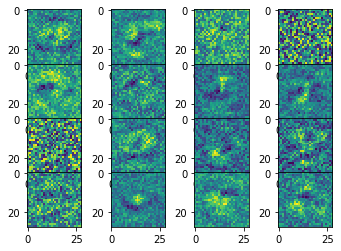

In [7]:
weights = []

for layer in model.layers:
    weights.append(layer.get_weights())

#print("The weights for the first layer: ", weights[0][0])

#print("The weights for the second layer: ", weights[1][0])

first = weights[0][0]

firstnew = []

i = 0
while i < 16:
    first2 = first[:,i].reshape(28,28)
    firstnew.append(first2)
    plt.imshow(first2)
    i += 1

grid = plt.GridSpec(4,4, wspace=0, hspace = 0)
plt.subplot(grid[0,0])

for i in range(4):
    for j in range(4):
        plt.subplot(grid[i,j])
        indexes = 4*i + j
        my_plot = plt.imshow(firstnew[indexes])

C:\Users\Duker\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


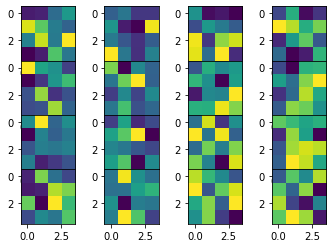

In [8]:
second = weights[1][0]
secondnew = []

i = 0
while i < 16:
    second2 = second[:,i].reshape(4,4)
    secondnew.append(second2)
    i += 1

grid = plt.GridSpec(4,4, wspace=0, hspace = 0)
plt.subplot(grid[0,0])

for i in range(4):
    for j in range(4):
        plt.subplot(grid[i,j])
        indexes = 4*i + j
        my_plot = plt.imshow(secondnew[indexes])

In [9]:
# b) The images significantly improve through each layer. The NN seems to be picking up on the colors & shapes of the images
# but they still are distorted. The weights obviously help improving the quality of the images. 

In [10]:
# start building the model
model_2 = Sequential()

# add a fully connected layer
model_2.add(Dense(16, activation='relu', input_shape=(784,)))

model_2.add(Dense(8, activation='relu', input_shape=(16,)))

model_2.add(Dense(num_classes, activation='softmax'))

model_2.compile(
     loss = 'categorical_crossentropy', # notice this isn't MSE because we're not doing regression
     optimizer = SGD(),
     metrics = ['accuracy'])            # want to monitor accuracy over training

history = model_2.fit(
    x_train, y_train,                 # training data to learn from 
    batch_size = batch_size,            # size of batches
    epochs = 10,                    # how many iterations we train for 
    validation_data = (x_test, y_test)) # validation data to test on

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 12us/step - loss: 1.8944 - accuracy: 0.3014 - val_loss: 1.5132 - val_accuracy: 0.4705
Epoch 2/10
60000/60000 [==============================] - 1s 10us/step - loss: 1.2498 - accuracy: 0.5882 - val_loss: 0.9809 - val_accuracy: 0.7099
Epoch 3/10
60000/60000 [==============================] - 1s 10us/step - loss: 0.8419 - accuracy: 0.7529 - val_loss: 0.6890 - val_accuracy: 0.7983
Epoch 4/10
60000/60000 [==============================] - 1s 9us/step - loss: 0.6385 - accuracy: 0.8169 - val_loss: 0.5457 - val_accuracy: 0.8482
Epoch 5/10
60000/60000 [==============================] - 1s 10us/step - loss: 0.5238 - accuracy: 0.8554 - val_loss: 0.4644 - val_accuracy: 0.8719
Epoch 6/10
60000/60000 [==============================] - 1s 10us/step - loss: 0.4596 - accuracy: 0.8733 - val_loss: 0.4181 - val_accuracy: 0.8847
Epoch 7/10
60000/60000 [==============================] - 1s 9us/step

C:\Users\Duker\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


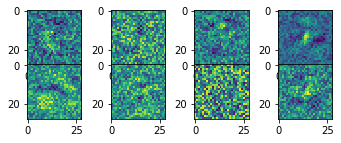

In [11]:
weights = []

for layer in model_2.layers:
    weights.append(layer.get_weights())

first = weights[0][0]
firstnew = []

i = 0
while i < 8:
    first2 = first[:,i].reshape(28,28)
    firstnew.append(first2)
    i += 1

grid = plt.GridSpec(4,4, wspace=0, hspace = 0)
plt.subplot(grid[0,0])

for i in range(2):
    for j in range(4):
        plt.subplot(grid[i,j])
        indexes = 4*i + j
        my_plot = plt.imshow(firstnew[indexes])

C:\Users\Duker\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


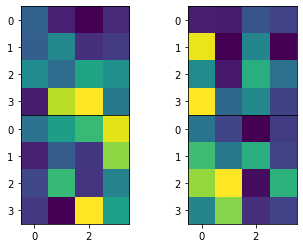

In [12]:
second = weights[1][0]
secondnew = []

i = 0
while i < 8:
    second2 = second[:,i].reshape(4,4)
    secondnew.append(second2)
    i += 1

grid = plt.GridSpec(2,2, wspace=0, hspace = 0)
plt.subplot(grid[0,0])

for i in range(2):
    for j in range(2):
        plt.subplot(grid[i,j])
        indexes = 4*i + j
        my_plot = plt.imshow(secondnew[indexes])

### Q3. (4 points)

Load the MNIST dataset again and train a convolutional neural network with 2 Conv2D layers. What do the weights look like now? How do they compare to those in Q2? What about the accuracy you achieve now? If it is higher, explain why you were able to achieve better accuracy? If it is the same or lower, explain why that is too.


Hint:

**We were able to achieve 99.25% test accuracy after 12 epochs.** 

You can use: MaxPooling2D, Dropout, Faltten and Dense layers

In [13]:
## your code here
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

In [14]:
from keras.datasets import mnist

#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#plot the first image in the dataset
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

#create model
model = Sequential()

#add model layers
model.add(Conv2D(64, kernel_size=3, activation= 'relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation= 'relu'))
model.add(Flatten())
model.add(Dense(10, activation= 'softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

#predict first 4 images in the test set
model.predict(X_test[:4])

#actual results for first 4 images in test set
y_test[:4]

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 79s 1ms/step - loss: 0.2346 - accuracy: 0.9500 - val_loss: 0.1086 - val_accuracy: 0.9693
Epoch 2/3
60000/60000 [==============================] - 88s 1ms/step - loss: 0.0705 - accuracy: 0.9790 - val_loss: 0.0889 - val_accuracy: 0.9747
Epoch 3/3
60000/60000 [==============================] - 92s 2ms/step - loss: 0.0482 - accuracy: 0.9851 - val_loss: 0.0864 - val_accuracy: 0.9770


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [15]:
weights = []

for layer in model.layers:
    weights.append(layer.get_weights())

In [18]:
first = weights[0][0][0][0]

firstnew = []
first.shape

# i = 0
# while i < 16:
#     first2 = first[:,i].reshape(8,8)
#     firstnew.append(first2)
#     plt.imshow(first2)
#     i += 1

# grid = plt.GridSpec(4,4, wspace=0, hspace = 0)
# plt.subplot(grid[0,0])

# for i in range(4):
#     for j in range(4):
#         plt.subplot(grid[i,j])
#         indexes = 4*i + j
#         my_plot = plt.imshow(firstnew[indexes])

(1, 64)

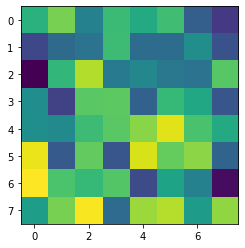

In [19]:
img = first.reshape(8,8)
plt.imshow(img)
plt.show()

In [ ]:
# 3. The weights are now 4D instead of 2D. The iterations take significantly longer to run but the accuracy is much better.
# Comparing the weights from this problem vs. #2, they seem to be visually clearer from the first layer vs. what they look
# like from Q2's first layer. 
# CNN works better thanks to parameter sharing: we are able to learn the same kernel for every position of the input image
# & spase interactions :P xD 